# CrossEntropy Method

## Importance sampling을 통한 estimation
Quantity $l$에 대한 추정을 하는 일반적인 문제를 생각해보자.
$$l=E_\textbf{u}[H(\textbf{X})]=\int H(\textbf{x})f(\textbf{x};\textbf{u}) d\textbf{x}$$

여기서 $H$는 어떤 performance function이며, $f(\textbf{x};\textbf{u})$는 parameter를 가진 distribution function이다. 

Importance sampling을 통해서 다음처럼 추정할 수 있다.

$$\hat{l}=\frac{1}{N}\sum_{i=1}^N H(\textbf{X}_i)\frac{f(\textbf{X}_i;\textbf{u})}{g(\textbf{X}_i)}$$

여기서 $\textbf{X}_1,...,\textbf{X}_N$은 $g$에서 뽑힌 random sample을 의미한다. H함수가 모두 양수를 나타낸다면, 이론적으로 optimal한 g는 다음처럼 주어진다.

$$g^*(\textbf{x})=\frac{H(\textbf{x})f(\textbf{x};\textbf{u})}{l}$$

그러나 이 식에서 $l$은 알 수 없다. Cross-entropy method는 위의 최적화된 $g^*$와 가까운 [parameter를 가진 distribution func.]를 찾는다.

## CrossEntrophy Method
* $t=1$로 놓는다. $\textbf{v}^0 = \textbf{u}$로 놓는다.(init params)
* $f(;\textbf{v}^t)$에서 $\textbf{X}_1,...,\textbf{X}_N$를 뽑는다.(sample)
* 다음을 수행
  * $$\textbf{v}^t=argmax_{v^t}{\frac{1}{N}\sum_{i=1}^N H(\textbf{X}_i)\frac{f(\textbf{X}_i;\textbf{u})}{f(\textbf{X}_i;\textbf{v}^{t-1})}log(f(\textbf{X}_i;\textbf{v}^t))}$$
  * 이 꼴이 사실 -만 취하고 argmin하면 cross-entropy를 minimize하는 꼴이라서 CE method라 한다.
* 수렴했다고 판단되면 stop, 아니면 2번부터 다시 반복


## 예제

$p(x)=N(0, 1)$, $H(x)=N(1, 1)$로 만들어서 $q(x)$를 $p(x)H(x)$에 가깝게 근사시켜본다.

In [42]:
import numpy as np
from scipy.stats import norm
import math

import matplotlib.pyplot as plt

def normpdf(x, mean, sd):
    var = float(sd)**2
    pi = 3.14159265
    denom = (2*pi*var+0.0000001)**.5
    num = math.exp(-(float(x)-float(mean))**2/(2*var+0.0000001))
    return num/denom


class Q:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
    
    def draw(self, size):
        return np.random.normal(self.mean, self.std, size)

    def prob(self, x):
        return normpdf(x, self.mean, self.std)

### distribution setting
$p(x)=N(0, 1)$, $H(x)=N(1, 1)$와 $p(x)*H(x)$를 그려본다.

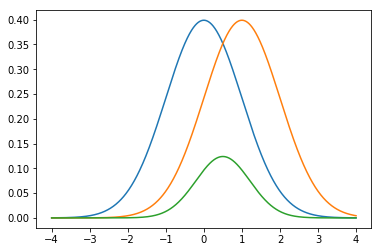

In [51]:
def p(x):
    return normpdf(x, 0, 1)
def H(x):
    return normpdf(x, 1, 1)

xs = np.linspace(-4, 4, 1000)

px = [p(x) for x in xs]
Hx = [H(x) for x in xs]
pxHx = [p(x)*H(x) for x in xs]

plt.plot(xs,px)
plt.plot(xs,Hx)
plt.plot(xs,pxHx)
plt.show()

In [49]:
q = Q(-100, 100)

n_sample=1000
draw_list = []

percentile = 10

for i in range(100):
    q_draw = q.draw(n_sample)
    
    if i % 20 == 0:
        print("mean: {: .3f}, std: {: .3f}".format(q.mean, q.std))
        draw_list.append(q_draw)
    
    px = [p(i) for i in q_draw]
    qx = [q.prob(i) for i in q_draw]
    Hx = [H(i) for i in q_draw]
    performance = np.array([p*h/(q+0.000001) for p, q, h in zip(px, qx, Hx)])


    # Pick up Elites...But why?
    thr = np.percentile(performance, percentile)
    idxs = [i for i, p in enumerate(performance) if p > thr]
    performance = q_draw[idxs]

    mu = np.mean(performance)
    sd = np.std(performance)
    
    q.mean = mu
    q.std = sd

mean: -100.000, std:  100.000
mean:  0.477, std:  0.671
mean:  0.389, std:  0.587
mean:  0.492, std:  0.697
mean:  0.415, std:  0.594


-99.8532135054


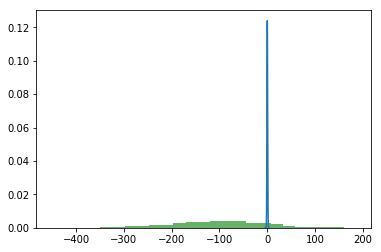

0.472983607743


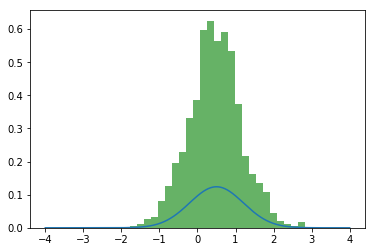

0.369752135884


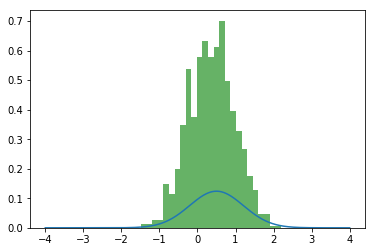

0.499688890244


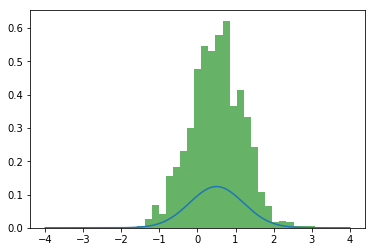

0.403263824278


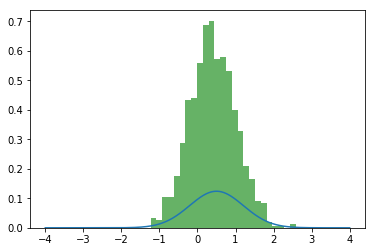

In [50]:
for draw in draw_list:
    plt.hist(draw, bins=25, normed=True, alpha=0.6, color='g')
    plt.plot(xs,pxHx)
    print(np.mean(draw))
    plt.show()